# Multi-Class Image Classification

The steps to perform multi-class classification are very similar to that of binary classification. Since we are dealing with more than 2 classes, some of the parameters will change - for example loss functions, the activation function of the prediction layer etc.

- Get familiar with the data
- Pre-process the data
- Create a model (start with a baseline)
- Fit the model 
- Evaluate the model
- Hyperparameter tuning to improve the model
- Repeat until satisfied

## Getting Familiar With The Data

The dataset being used is **food classification dataset** which has 10 classes of food items separated into train and test sets. The train set has 750 images per class and the test set has 250 images per class.  

The usual data cleanup and data analysis operations will be performed first before getting started with the model training.

In [1]:
from utils import get_dir

data_dir = get_dir('food_classification')
data_dir

PosixPath('/Users/enigma6174/Dev/courses/tensorflow-learn/cnn/data/food_classification')

In [2]:
from utils import tree

tree(data_dir, '*.jpg')

+ /Users/enigma6174/Dev/courses/tensorflow-learn/cnn/data/food_classification
+ food_classification (0 files)
   + test (0 files)
      + chicken_curry (250 files)
      + chicken_wings (250 files)
      + fried_rice (250 files)
      + grilled_salmon (250 files)
      + hamburger (250 files)
      + ice_cream (250 files)
      + pizza (250 files)
      + ramen (250 files)
      + steak (250 files)
      + sushi (250 files)
   + train (0 files)
      + chicken_curry (750 files)
      + chicken_wings (750 files)
      + fried_rice (750 files)
      + grilled_salmon (750 files)
      + hamburger (750 files)
      + ice_cream (750 files)
      + pizza (750 files)
      + ramen (750 files)
      + steak (750 files)
      + sushi (750 files)


In [3]:
from utils import generate_classes

train_dir = data_dir/'train'
test_dir = data_dir/'test'

classes = generate_classes(data_dir/'train')
classes, len(classes)

(array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
        'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
       dtype='<U14'),
 10)

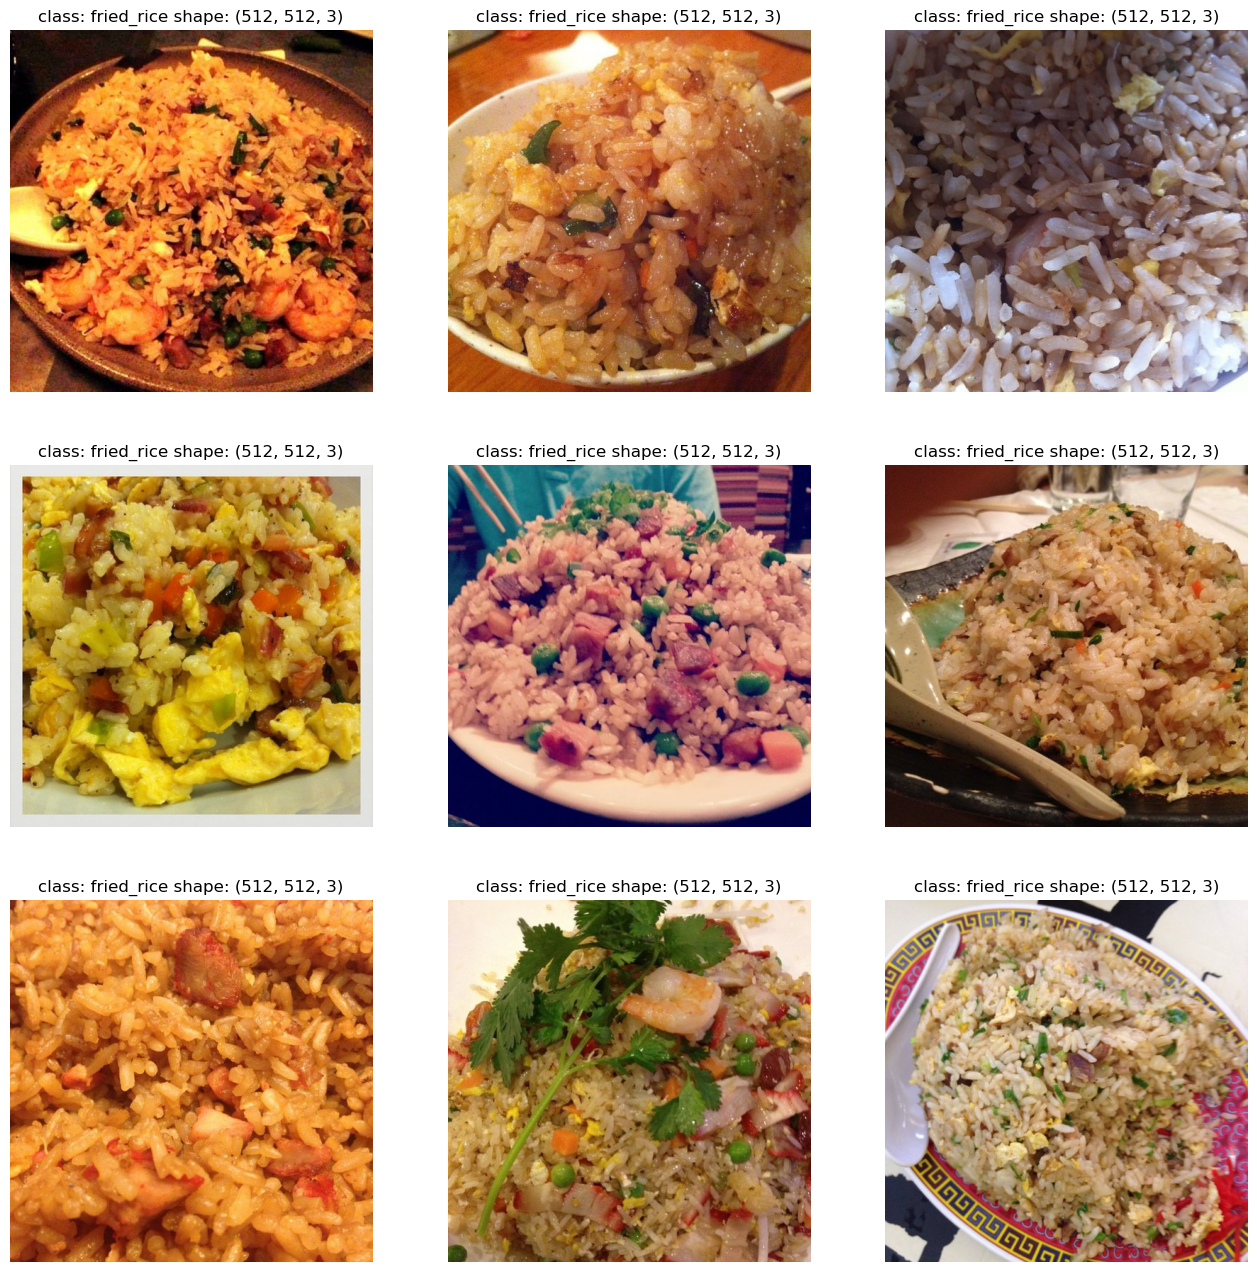

In [4]:
from utils import generate_plots

generate_plots(data_dir/'train', classes[2])

## Preprocess The Data

The data needs to be preprocessed before loading into the model for training. For the baseline model, only rescaling is enough for the pre-processing. Based on the results of the training on the baseline model, other pre-processing actions like **data augmentation** can be performed.

- Turn the images into numbers
- Make sure the tensors are of the right shape
- Scale features (normalize/standardize/regularize etc.)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

train_data = datagen.flow_from_directory(data_dir/'train',
                                         target_size=(224, 224),
                                         batch_size=32,
                                         subset='training')

validation_data = datagen.flow_from_directory(data_dir/'train',
                                              target_size=(224, 224),
                                              batch_size=8,
                                              subset='validation')

Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


## Build And Train The Model

To train the baseline CNN model we will use the TinyVGG Model from CNN Explainer website. The model structure is:

- input layer
- convolutional layer + relu layer
- convolutional layer + relu layer + max pool layer
- convolutional layer + relu layer
- convolutional layer + relu layer + max pool layer
- output layer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [7]:
_model = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # first convolution layer with input
    Conv2D(10, 3, activation='relu'), # second convolution layer
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'), # third convolution layer
    Conv2D(10, 3, activation='relu'), # fourth convolution layer
    MaxPool2D(),
    Flatten(), # dense layer input
    Dense(10, activation='softmax') # output layer
])

Metal device set to: Apple M1 Pro


2023-01-28 19:37:38.241951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-28 19:37:38.242115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
_model.compile(loss=CategoricalCrossentropy(),
               optimizer=Adam(), 
               metrics=['accuracy'])

In [9]:
_history = _model.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=validation_data,
                      validation_steps=len(validation_data))

Epoch 1/5


2023-01-28 19:37:44.823176: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-28 19:37:45.016813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 2.1735 - accuracy: 0.2022

2023-01-28 19:37:57.304722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 16s 81ms/step - loss: 2.1735 - accuracy: 0.2022 - val_loss: 2.0382 - val_accuracy: 0.2753
Epoch 2/5
188/188 [==============================] - 15s 82ms/step - loss: 1.9279 - accuracy: 0.3192 - val_loss: 2.0194 - val_accuracy: 0.2807
Epoch 3/5
188/188 [==============================] - 15s 82ms/step - loss: 1.6429 - accuracy: 0.4438 - val_loss: 2.0241 - val_accuracy: 0.3140
Epoch 4/5
188/188 [==============================] - 16s 83ms/step - loss: 1.0769 - accuracy: 0.6547 - val_loss: 2.2236 - val_accuracy: 0.2953
Epoch 5/5
188/188 [==============================] - 16s 83ms/step - loss: 0.4412 - accuracy: 0.8673 - val_loss: 3.1610 - val_accuracy: 0.2913


In [16]:
_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

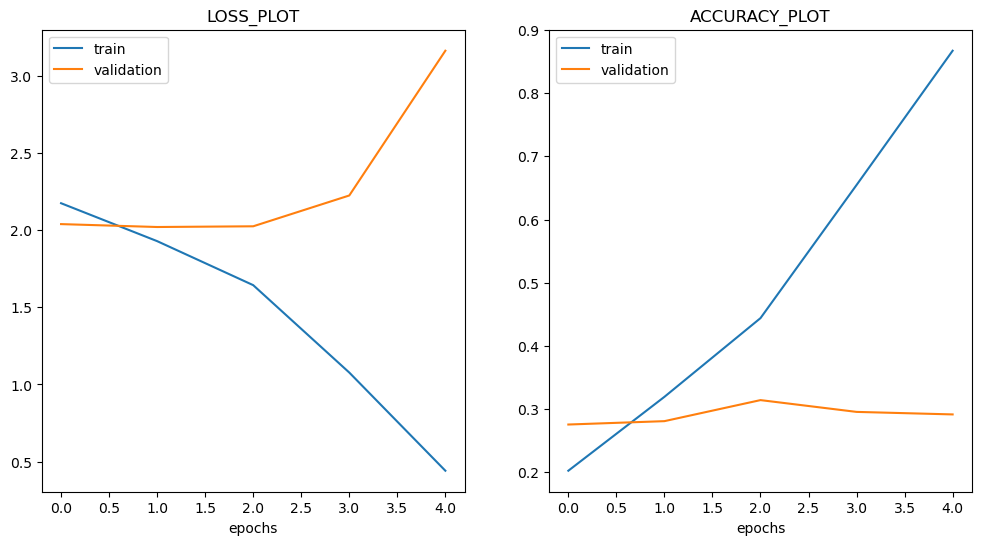

In [10]:
from utils import plot_history

plot_history(_history)

## Overfitting

It is evident from the above plots that the model is overfitting - the loss and accuracy on validation data decrease over time whereas it increases for training data. Therefore, the model is failing to generalize to new images/instances and hence overfitting. 

In [11]:
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(data_dir/'test',
                                                                   target_size=(224, 224))

Found 2500 images belonging to 10 classes.


In [12]:
_model.evaluate(test_data)

79/79 [==============================] - 5s 64ms/step - loss: 3.0244 - accuracy: 0.2824


[3.0243635177612305, 0.2824000120162964]

## Improving The Baseline: Model With More Complexity

The **baseline loss** is `3.7636` whereas the **baseline accuracy** is `0.25` *(or 25%)* and the target now is to improve upon this baseline score. Some actions that can be taken to improve the baseline score:

- Adjust convolution layers
- Adjust dense layers
- Data augmentation
- Modifying the learning rate

In [13]:
model_1 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)), # first convolution layer with input
    Conv2D(64, 3, activation='relu'), # second convolution layer
    MaxPool2D(2),
    Conv2D(32, 3, activation='relu'), # third convolution layer
    Conv2D(32, 3, activation='relu'), # fourth convolution layer
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'), # fifth convolution layer
    MaxPool2D(2),
    Flatten(), # dense layer input
    Dense(128, activation='relu'), # dense layer
    Dense(10, activation='softmax') # output layer
])

In [14]:
model_1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [15]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/5


2023-01-28 19:41:13.339383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 2.2107 - accuracy: 0.1675

2023-01-28 19:41:51.436261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 42s 221ms/step - loss: 2.2107 - accuracy: 0.1675 - val_loss: 2.1238 - val_accuracy: 0.2280
Epoch 2/5
188/188 [==============================] - 41s 218ms/step - loss: 2.0528 - accuracy: 0.2530 - val_loss: 2.0906 - val_accuracy: 0.2640
Epoch 3/5
188/188 [==============================] - 41s 217ms/step - loss: 1.8828 - accuracy: 0.3388 - val_loss: 1.9627 - val_accuracy: 0.3153
Epoch 4/5
188/188 [==============================] - 41s 216ms/step - loss: 1.4985 - accuracy: 0.4890 - val_loss: 2.1969 - val_accuracy: 0.3293
Epoch 5/5
188/188 [==============================] - 41s 216ms/step - loss: 1.0388 - accuracy: 0.6503 - val_loss: 2.6209 - val_accuracy: 0.2987


In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [18]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 2.6098 - accuracy: 0.3056


[2.609769344329834, 0.30560001730918884]

## Improving The Baseline: Model With Less Complexity

In [20]:
model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)), # first convolution layer with inputs
    Conv2D(32, 3, activation='relu'), # second convolution layer
    MaxPool2D(2),
    Flatten(), # dense layer input
    Dense(100, activation='relu'), # dense layer
    Dense(10, activation='softmax') # output layer
])

In [21]:
model_2.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

In [22]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Epoch 1/5


2023-01-28 19:49:06.955995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 2.6342 - accuracy: 0.1587

2023-01-28 19:49:52.661405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 49s 259ms/step - loss: 2.6342 - accuracy: 0.1587 - val_loss: 2.2832 - val_accuracy: 0.1540
Epoch 2/5
188/188 [==============================] - 49s 260ms/step - loss: 1.9416 - accuracy: 0.3318 - val_loss: 2.0846 - val_accuracy: 0.2807
Epoch 3/5
188/188 [==============================] - 49s 260ms/step - loss: 0.9485 - accuracy: 0.7260 - val_loss: 2.4414 - val_accuracy: 0.2620
Epoch 4/5
188/188 [==============================] - 49s 260ms/step - loss: 0.1576 - accuracy: 0.9688 - val_loss: 3.9418 - val_accuracy: 0.2653
Epoch 5/5
188/188 [==============================] - 49s 260ms/step - loss: 0.0393 - accuracy: 0.9932 - val_loss: 4.4699 - val_accuracy: 0.2513


In [23]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 387200)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               38720100  
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

In [24]:
model_2.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 4.3424 - accuracy: 0.2628


[4.342372894287109, 0.262800008058548]

## Improving The Baseline: Model With Data Augmentation

Introduce data augmentation techniques like rotation, zoom, flipping etc. to improve the model performance. Data augmentation techniques are only applied to training data.

In [39]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = augmented_datagen.flow_from_directory(
    data_dir/'train',
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

validation_data = augmented_datagen.flow_from_directory(
    data_dir/'train',
    target_size=(224, 224),
    batch_size=8,
    subset='validation'
)

Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [40]:
model_3 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)), # first convolution layer with input
    Conv2D(64, 3, activation='relu'), # second convolution layer
    MaxPool2D(2),
    Conv2D(32, 3, activation='relu'), # third convolution layer
    Conv2D(32, 3, activation='relu'), # fourth convolution layer
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'), # fifth convolution layer
    MaxPool2D(2),
    Flatten(), # dense layer input
    Dense(128, activation='relu'), # dense layer
    Dense(10, activation='softmax') # output layer
])

In [41]:
model_3.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

In [42]:
history_3 = model_3.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Epoch 1/10


2023-01-28 20:18:11.399459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 2.2526 - accuracy: 0.1538

2023-01-28 20:18:54.139243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 54s 283ms/step - loss: 2.2526 - accuracy: 0.1538 - val_loss: 2.1792 - val_accuracy: 0.1787
Epoch 2/10
188/188 [==============================] - 53s 282ms/step - loss: 2.1703 - accuracy: 0.1983 - val_loss: 2.1340 - val_accuracy: 0.2247
Epoch 3/10
188/188 [==============================] - 53s 282ms/step - loss: 2.1363 - accuracy: 0.2210 - val_loss: 2.0970 - val_accuracy: 0.2360
Epoch 4/10
188/188 [==============================] - 53s 280ms/step - loss: 2.0882 - accuracy: 0.2472 - val_loss: 2.0420 - val_accuracy: 0.2727
Epoch 5/10
188/188 [==============================] - 53s 281ms/step - loss: 2.0383 - accuracy: 0.2687 - val_loss: 2.0774 - val_accuracy: 0.2653
Epoch 6/10
188/188 [==============================] - 53s 281ms/step - loss: 2.0068 - accuracy: 0.2788 - val_loss: 1.9789 - val_accuracy: 0.3027
Epoch 7/10
188/188 [==============================] - 53s 282ms/step - loss: 1.9798 - accuracy: 0.2927 - val_loss: 1.9696 - val_accuracy: 0.3

In [43]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.7375 - accuracy: 0.3920


[1.7374963760375977, 0.3920000195503235]

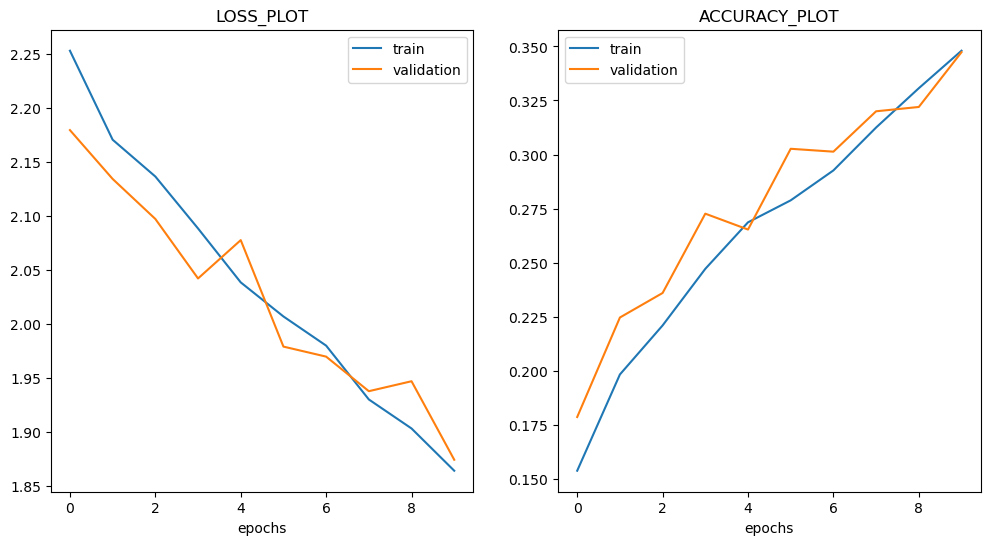

In [44]:
plot_history(history_3)

In [45]:
from tensorflow.keras.models import clone_model

# clone the baseline model
model_4 = clone_model(_model)
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [46]:
model_4.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

In [47]:
history_4 = model_4.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Epoch 1/10


2023-01-28 20:33:48.675506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 2.2172 - accuracy: 0.1780

2023-01-28 20:34:30.444030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 52s 277ms/step - loss: 2.2172 - accuracy: 0.1780 - val_loss: 2.1274 - val_accuracy: 0.2267
Epoch 2/10
188/188 [==============================] - 52s 278ms/step - loss: 2.1016 - accuracy: 0.2473 - val_loss: 2.1392 - val_accuracy: 0.2267
Epoch 3/10
188/188 [==============================] - 54s 285ms/step - loss: 2.0433 - accuracy: 0.2703 - val_loss: 2.0080 - val_accuracy: 0.2900
Epoch 4/10
188/188 [==============================] - 53s 281ms/step - loss: 1.9884 - accuracy: 0.2948 - val_loss: 2.0832 - val_accuracy: 0.2967
Epoch 5/10
188/188 [==============================] - 52s 279ms/step - loss: 1.9607 - accuracy: 0.3155 - val_loss: 2.0160 - val_accuracy: 0.2873
Epoch 6/10
188/188 [==============================] - 51s 273ms/step - loss: 1.9329 - accuracy: 0.3330 - val_loss: 2.0280 - val_accuracy: 0.3020
Epoch 7/10
188/188 [==============================] - 51s 272ms/step - loss: 1.9292 - accuracy: 0.3337 - val_loss: 1.9370 - val_accuracy: 0.3

In [48]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.7108 - accuracy: 0.4168


[1.710822582244873, 0.41680002212524414]

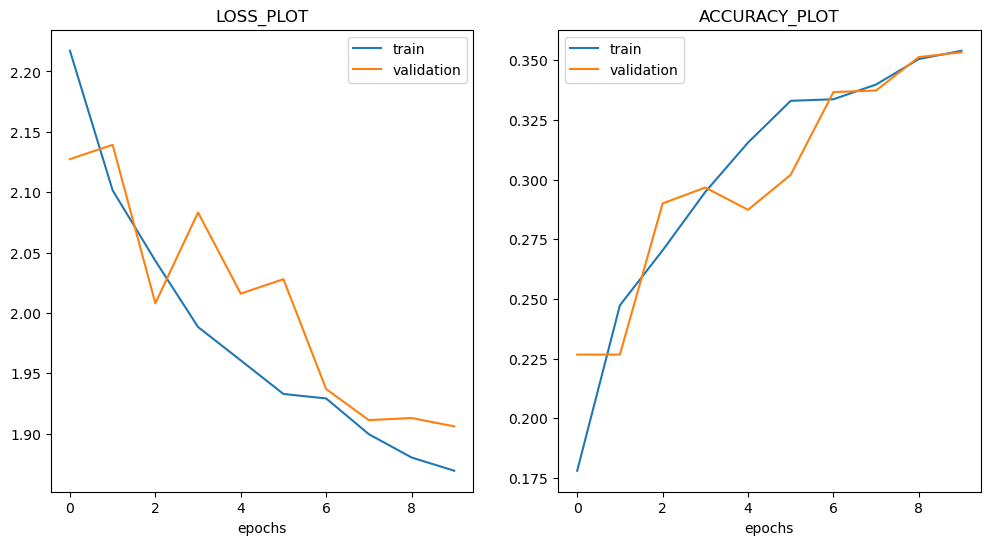

In [49]:
plot_history(history_4)